In [25]:
import pandas as pd              # used to analyze data 
import numpy as np               # working with arrays
import matplotlib.pyplot as plt  # matlab ploting
import seaborn as sns            # data visualization library 
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Data Content

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [6]:
data = pd.read_csv('./data.csv')

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
remove=['id','Unnamed: 32']
data_new = data.drop(columns=remove,axis =1) #removing data that are not required 

In [9]:
data_new.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
col=data_new.columns
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### Diagnosis has a Alphabetical value . we have to change it to binnary numbers

In [11]:
data_new['diagnosis'] = [1 if each == "B" else 0 for each  in data_new.diagnosis]
data_new.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### lets set X as the features and Y as the target variable.

In [12]:
x= data_new.drop(columns=['diagnosis'],axis =1)
y = data_new['diagnosis']

In [14]:
x.describe() #order to visualize data, values should be closer each other.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
x.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Not a single null values in this data

##### Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization. We are using Robust scaling.

One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

This is called robust standardization or robust data scaling.

This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.

$$
value = \frac{value - median}{p_{75} - p_{25}}
$$

In [17]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
Data_scaled=rb.fit_transform(x)   #The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

But this method converts the data into ndArray so we have to again convert it into Dataframe

In [20]:
X_Scaled = pd.DataFrame(data=Data_scaled,columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
      'symmetry_worst', 'fractal_dimension_worst'])
X_Scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


### Visualization
Let's Visualize the features and their relations with each other. So, that we can reduce the features and get a better results.

First we will create Heat map . This is done to see the correlation of every feature with each other.

<AxesSubplot:>

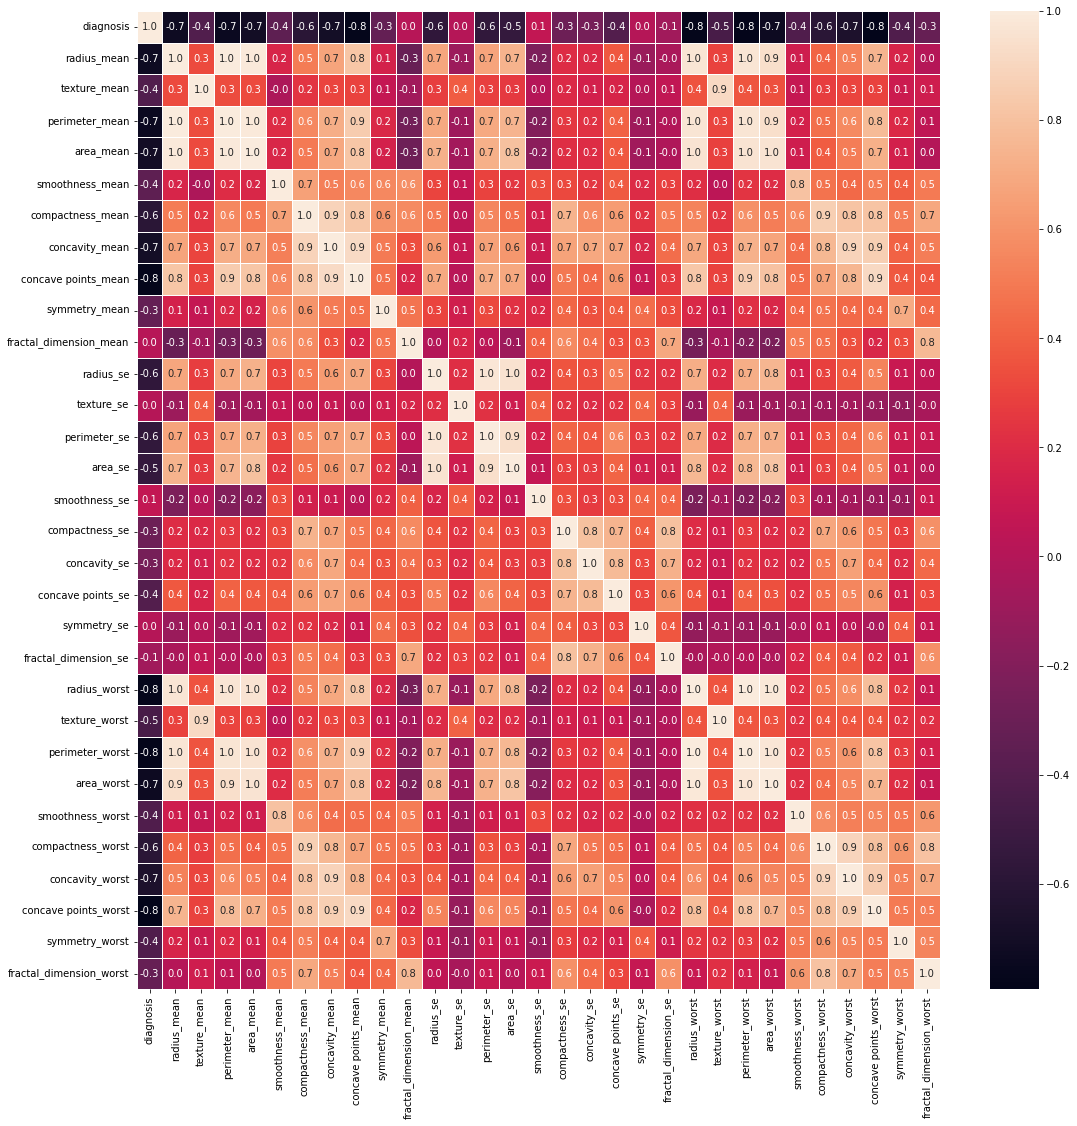

In [21]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_new.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

$\text{lightest ones  are  related  to  one  anothers(As light as correlated)}$

$$
\text{For the above heat map we can see that radius_mean, Perimeter_mean and area_mean has a very high correlation .If yes, then we can leave one out. We also noticed that Concavity_worst and Concave_point_worst have correlation.Fractal_dimension_worst has high correlation with fractal_dimension_mean and compactness_worst.So, we plot joint point to see that their Gaussian distribution is similar or not.}
$$

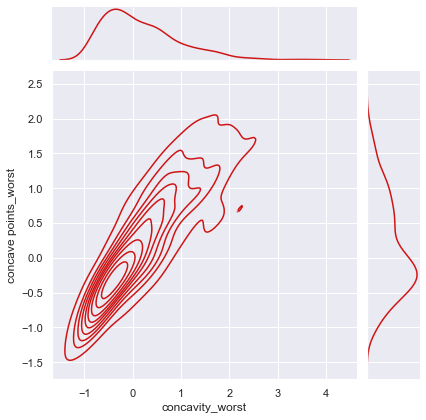

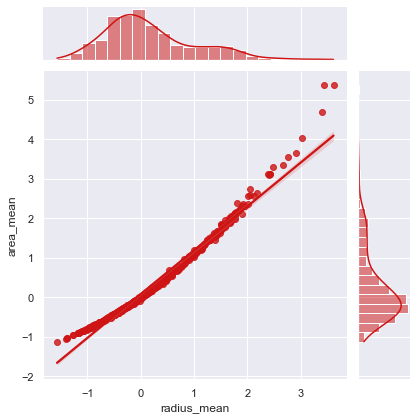

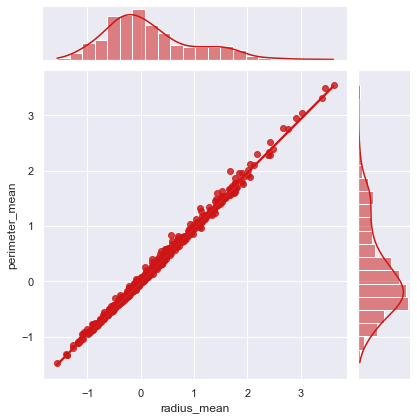

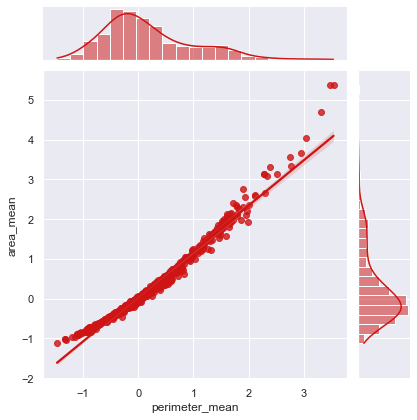

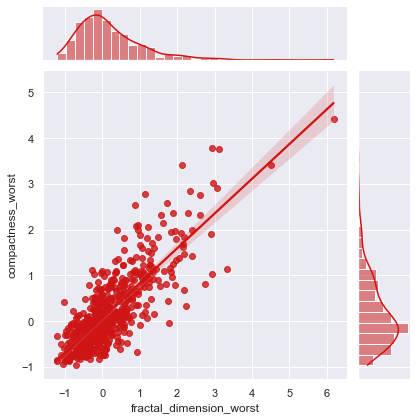

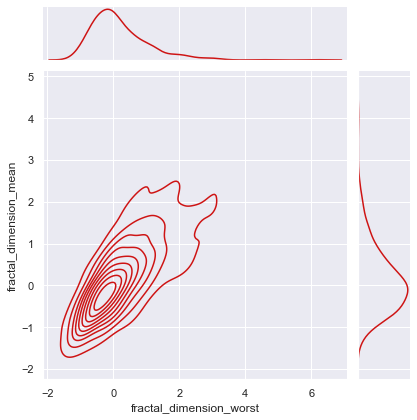

In [26]:
sns.jointplot(X_Scaled.loc[:,'concavity_worst'], X_Scaled.loc[:,'concave points_worst'], kind="kde", color="#ce1414")
sns.jointplot(X_Scaled.loc[:,'radius_mean'], X_Scaled.loc[:,'area_mean'], kind="reg", color="#ce1414")
sns.jointplot(X_Scaled.loc[:,'radius_mean'], X_Scaled.loc[:,'perimeter_mean'], kind="reg", color="#ce1414")
sns.jointplot(X_Scaled.loc[:,'perimeter_mean'], X_Scaled.loc[:,'area_mean'], kind="reg", color="#ce1414")
sns.jointplot(X_Scaled.loc[:,'fractal_dimension_worst'], X_Scaled.loc[:,'compactness_worst'], kind="reg", color="#ce1414")
sns.jointplot(X_Scaled.loc[:,'fractal_dimension_worst'], X_Scaled.loc[:,'fractal_dimension_mean'], kind="kde", color="#ce1414")

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

**Some feature of joint plot tell us that 2 features have kinda same gaussian distribution. but dont have . so, we will elimated the feature after considering all the factors.**

__Box plot will show the outliner values . we will consider this plot for feature selection.__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

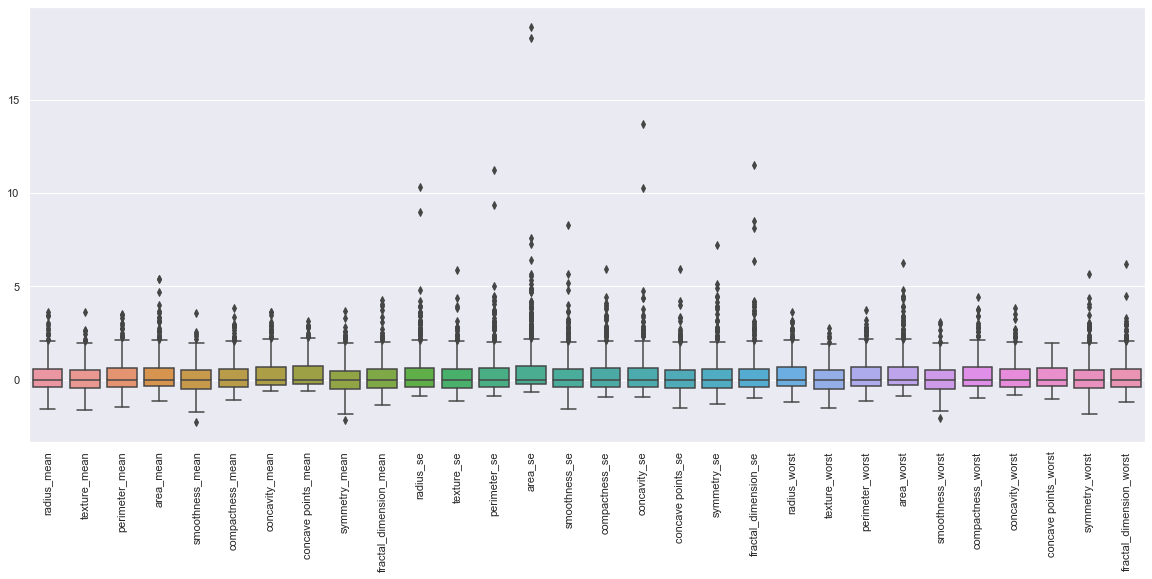

In [41]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=X_Scaled)
plt.xticks(rotation =90)

### **violin** and **swarm** plot 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

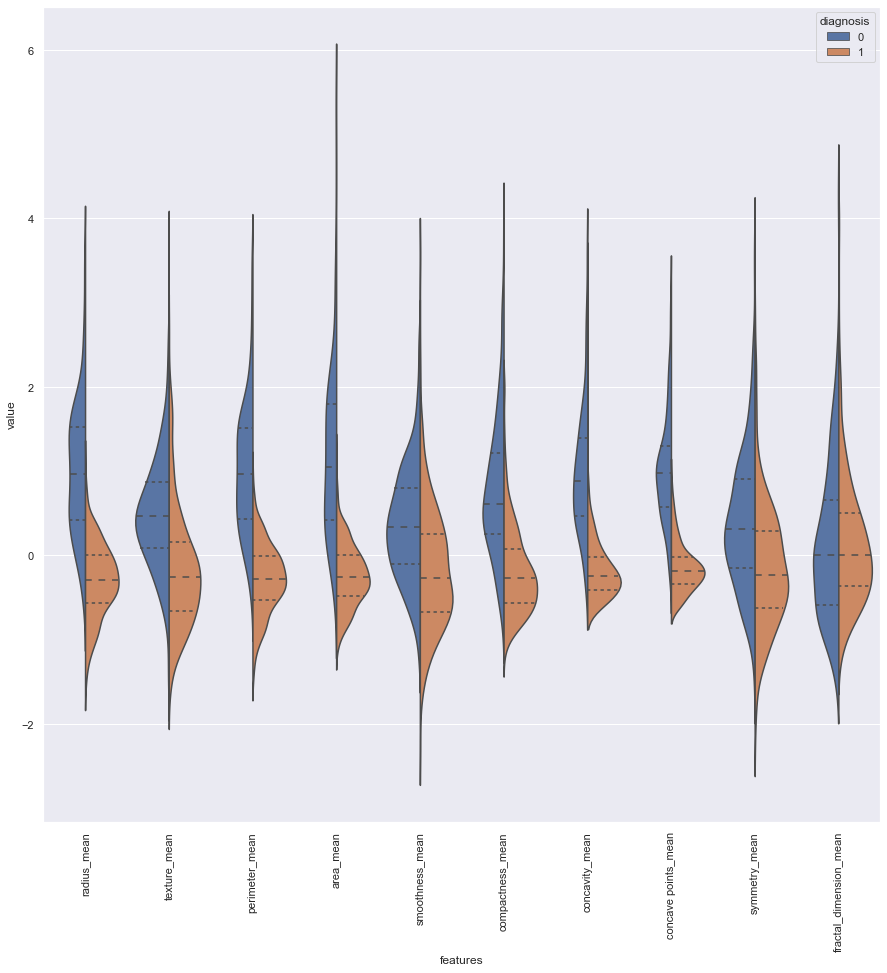

In [33]:
#1 to 10 features
data_dia = y
data = x          # standardization
data = pd.concat([y,X_Scaled.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

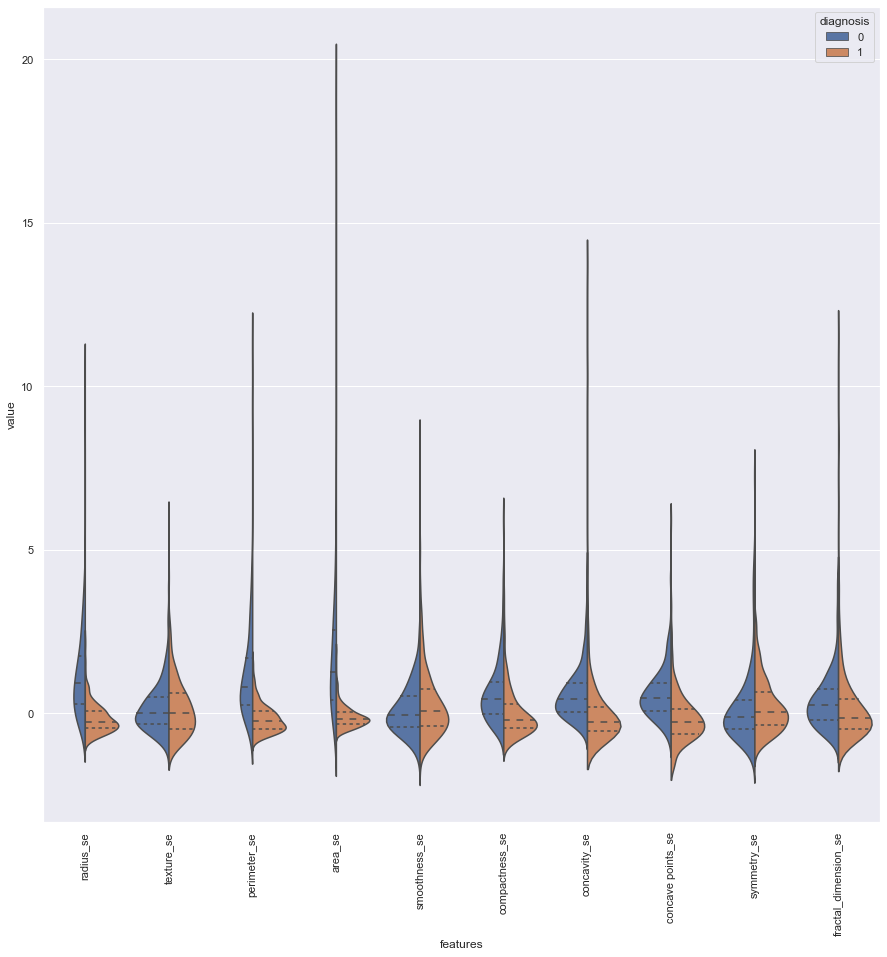

In [43]:
#10 to 20 features
data_dia = y
data = x          # standardization
data = pd.concat([y,X_Scaled.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

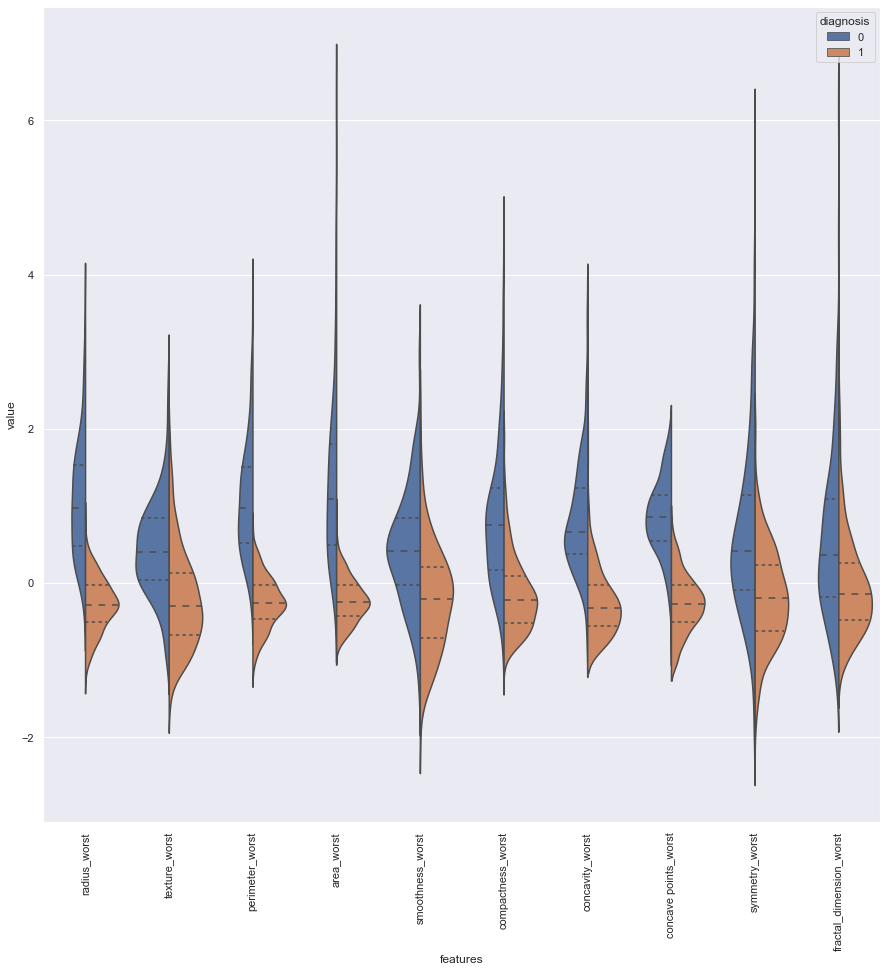

In [45]:
# 21 to 30 features
data_dia = y
data = x          # standardization
data = pd.concat([y,X_Scaled.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

$\text{Swarm Plot}$

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

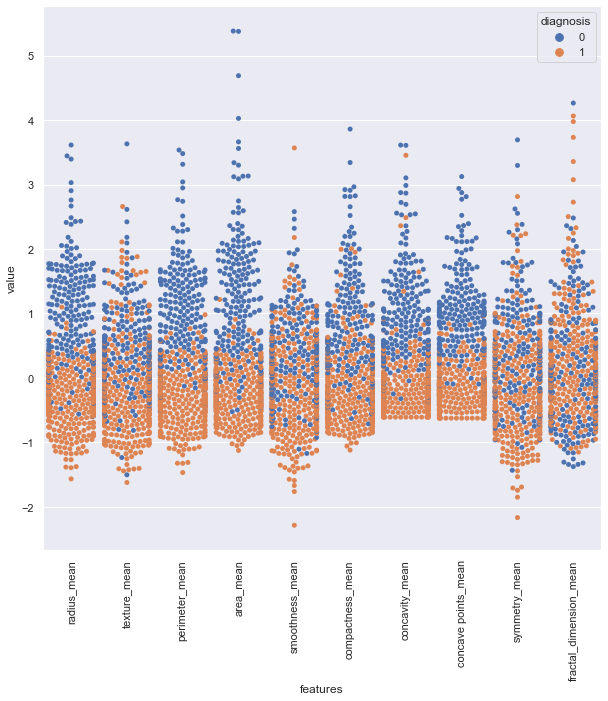

In [46]:
data = pd.concat([y,X_Scaled.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

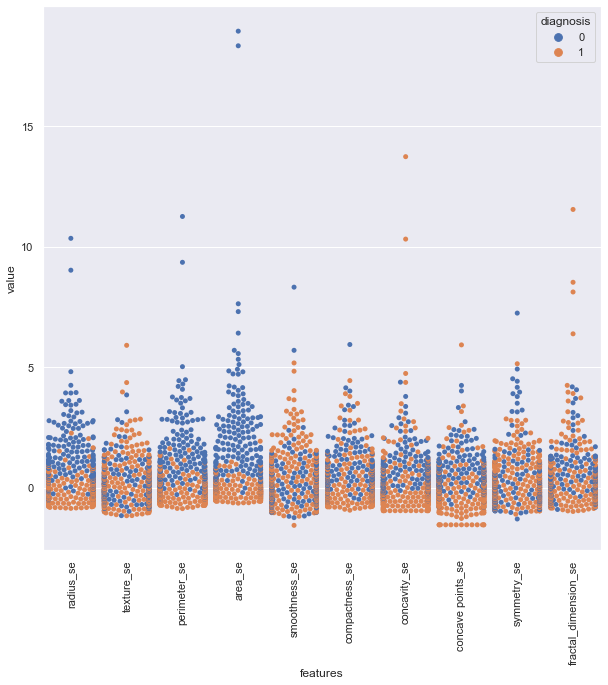

In [47]:
data = pd.concat([y,X_Scaled.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

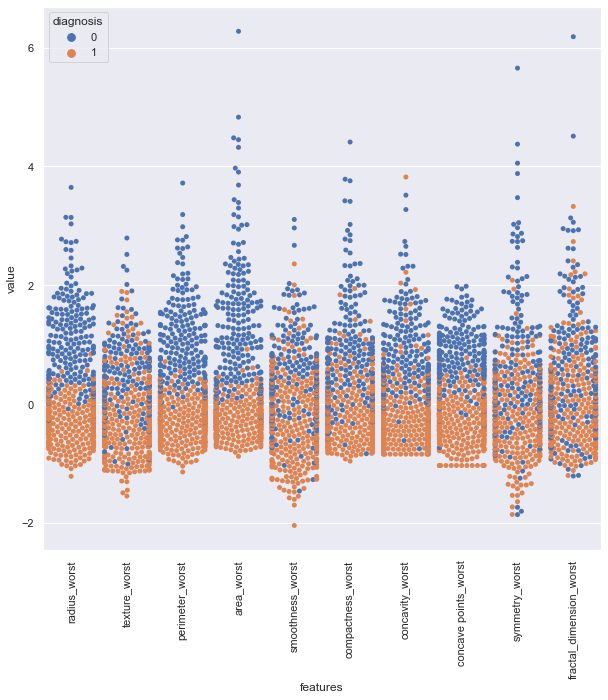

In [48]:
data = pd.concat([y,X_Scaled.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

$\text{After ploting everything. We can see so many relations and from these plot we can simply elimate features .}$

$\text{After all the plot and analysis I have selected 16 best features and removed 14 features. I also keep in mind the model should not over fitted . I did all the permutation and combination to get the best features.}$
1. Area_mean
2. Smoothness_mean
3. Concave points_mean
4. Symmetry_mean
5. Radius_se
6. Texture_se
7. Smoothness_se
8. Concave points_se
9. Symmetry_se
10. Fractal_dimension_se
11. Texture_worst
12. Perimeter_worst
13. Area_worst
14. Concavity_worst
15. Symmetry_worst 16)fractal_dimension_worst

In [49]:
droplist=['radius_mean', 'texture_mean', 'perimeter_mean', 'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'perimeter_se', 'area_se','compactness_se', 'concavity_se', 'radius_worst',
      'smoothness_worst','compactness_worst', 'concave points_worst']
X_feature_select=X_Scaled.drop(droplist,axis = 1 )    

In [50]:
v=X_feature_select.columns
v

Index(['area_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

<AxesSubplot:>

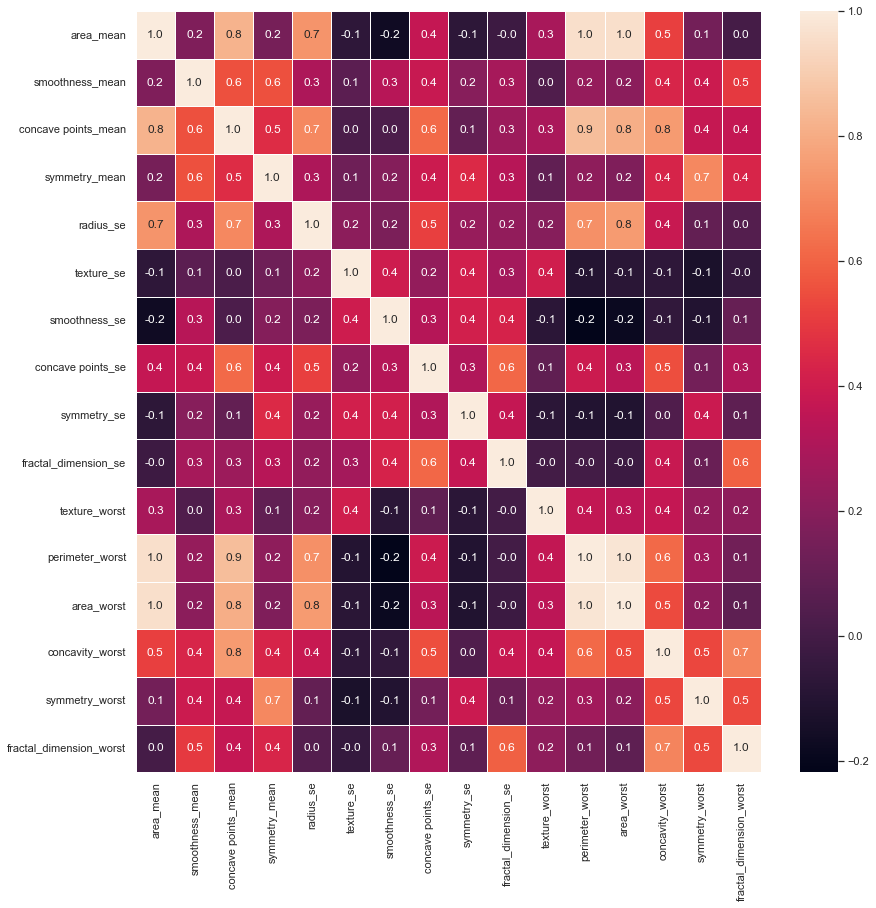

In [51]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_feature_select.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

$\text{Let us Import all the libraries we need.}$

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

1) First we will use KNN Algorithm on our model.

We are divide Training and testing data set into 72% and 28%. Little diffrently we are dividing that data.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_feature_select, y, test_size=0.28,random_state=42 )
for i in range(1,17):
    neigh = KNeighborsClassifier(n_neighbors=i)
    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
    scores = cross_val_score(neigh, x_test, y_test, scoring='accuracy', cv=cv)
    print('k=%d : %.3f' % (i, (np.mean(scores))))

k=1 : 0.934
k=2 : 0.934
k=3 : 0.953
k=4 : 0.959
k=5 : 0.956
k=6 : 0.948
k=7 : 0.951
k=8 : 0.939
k=9 : 0.929
k=10 : 0.933
k=11 : 0.934
k=12 : 0.935
k=13 : 0.936
k=14 : 0.936
k=15 : 0.934
k=16 : 0.933


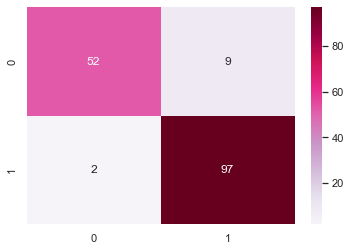

In [56]:
y_pred = cross_val_predict(neigh, x_test, y_test, cv=10)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()

$\text{Accuracy is almost 95.9% at 4th epochs . above we can see the confusion matrix.}$

2) lets try some other Algorithm.Lets try Random forest Algorithm to find out the results.

Accuracy is:  97.5
                    precision    recall  f1-score   support

Malignant(Class 0)       0.98      0.95      0.97        61
  Benign (Class 1)       0.97      0.99      0.98        99

          accuracy                           0.97       160
         macro avg       0.98      0.97      0.97       160
      weighted avg       0.98      0.97      0.97       160



<AxesSubplot:>

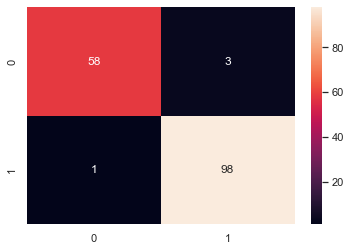

In [57]:
# split data train 72% and test 28%
x_train, x_test, y_train, y_test = train_test_split(X_feature_select, y, test_size=0.28, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train,y_train)
clr = clr_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))*100
print('Accuracy is: ',ac)
print(classification_report(y_test,clr, 
                            target_names = ['Malignant(Class 0)','Benign (Class 1)']))
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

$\text{Accuracy is:  97.5}$

**Logistic Regression**

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X_feature_select, y, test_size=0.28, random_state=42)
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)


prediction_lr = classifier_lr.predict(x_test)
print(classification_report(y_test, prediction_lr, 
                            target_names = ['Malignant(Class 0)','Benign (Class 1)']))

                    precision    recall  f1-score   support

Malignant(Class 0)       0.97      0.98      0.98        61
  Benign (Class 1)       0.99      0.98      0.98        99

          accuracy                           0.98       160
         macro avg       0.98      0.98      0.98       160
      weighted avg       0.98      0.98      0.98       160



In [61]:
accuracy_score(y_test,prediction_lr)*100

98.125

$\text{Accuracy of Logistic Regression model is 98.125}$

<AxesSubplot:>

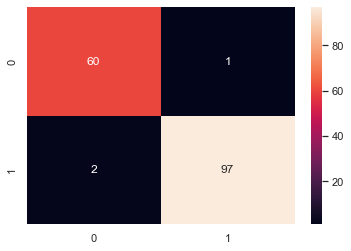

In [62]:
cm = confusion_matrix(y_test,classifier_lr.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

**XG BOOST**

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_feature_select, y, test_size=0.28, random_state=42)
xgb = xgboost.XGBClassifier(earning_rate=0.009, n_estimators=350, subsample=0.8, max_depth=7)
xgb.fit(x_train,y_train)
prediction_xgb = xgb.predict(x_test)
print(classification_report(y_test, prediction_xgb, 
                            target_names = ['Malignant(Class 0)','Benign (Class 1)']))

[11:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "earning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                    precision    recall  f1-score   support

Malignant(Class 0)       0.98      0.97      0.98        61
  Benign (Class 1)       0.98      0.99      0.98        99

          accuracy                           0.98       160
         macro avg       0.

In [64]:
accuracy_score(y_test,prediction_xgb)*100

98.125

$\text{Accuracy of XGB model is 98.125}$

<AxesSubplot:>

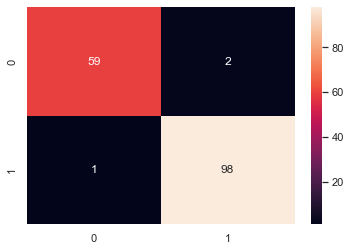

In [65]:
cm = confusion_matrix(y_test,xgb.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Conclusion:

1. KNN gives us accuracy of 95.9%
2. Random Forest gives us accuracy of 97.5%
3. Logistic Regression gives us accuracy of 98.125%
4. XG Boost gives us accuracy of 98.125%
- XG Boost and Logistic Regression is best